In [1]:
# Parameters
variable = "tos_max"
long_name = "Sea Surface Temperature"


# tos_max

In [2]:
from IPython.display import display, Markdown

In [3]:
# Dynamically generate markdown content
markdown_text = f" This notebook compares area-weighted mean and, in some cases, integral time series for {variable} in different basins."

# Display the updated markdown content
display(Markdown(markdown_text))

 This notebook compares area-weighted mean and, in some cases, integral time series for tos_max in different basins.

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%%capture 
# comment above line to see details about the run(s) displayed
import sys, os
sys.path.append(os.path.abspath(".."))
from misc import *
import glob
print("Last update:", date.today())
%matplotlib inline

In [6]:
# figure size
fs = (10,4)

In [7]:
# load data
ds = []
for c, p in zip(casename, ocn_path):
  file = glob.glob(p+'{}.native.{}.??????-??????.nc'.format(c, variable))[0]
  ds.append(xr.open_dataset(file))

In [8]:
def ts_plot(variable, ds, fs, label, reg='Global'):
    """
    Plot time series of regional means and integrals for a given variable from a list of datasets.

    Parameters
    ----------
    variable : str
        Name of the variable to plot (prefix for "_mean" and "_int" variables in dataset).
    ds : list of xarray.Dataset
        List of datasets, each containing time series data for the specified variable with
        variables named as `<variable>_mean` and optionally `<variable>_int`, and with
        attributes 'long_name', 'units_mean', and optionally 'units_int'.
    fs : tuple
        Figure size (width, height) in inches for the plots.
    label : list of str
        List of labels corresponding to each dataset, used for the legend.
    reg : str, optional
        Name of the region to select for plotting (default is 'Global').

    Returns
    -------
    None
        Displays the plots but does not return any value.

    Notes
    -----
    - This function creates one or two plots:
        1. A time series of the variable's regional mean (`<variable>_mean`).
        2. If available, a time series of the variable's regional integral (`<variable>_int`).
    - The function expects each dataset to have attributes 'long_name', 'units_mean', and optionally 'units_int'.
    - The same region name is applied across all datasets.
    """
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fs)
    for l, i in zip(label, range(len(label))):
        ds[i][variable+"_mean"].sel(region=reg).plot(ax=ax, label=l, lw=3, linestyle=linestyle[i], color=color[i])
    
    long_name = ds[0].attrs['long_name']
    ax.set_title("{}, {}".format(reg, long_name))
    ax.set_ylabel(variable+"_mean, " + ds[i].attrs['units_mean'])
    ax.set_xlabel('Year')
    ax.grid()
    ax.legend(ncol=3, loc=1)
    
    if variable+"_int" in ds[0]:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fs)
        for l, i in zip(label, range(len(label))):
            ds[i][variable+"_int"].sel(region=reg).plot(ax=ax, label=l, lw=3, linestyle=linestyle[i], color=color[i])

        ax.set_title("{}, {}".format(reg, long_name))
        ax.set_ylabel(variable+"_int, " + ds[i].attrs['units_int'])
        ax.set_xlabel('Year')
        ax.grid()
        ax.legend(ncol=3, loc=1)

    return

## Global

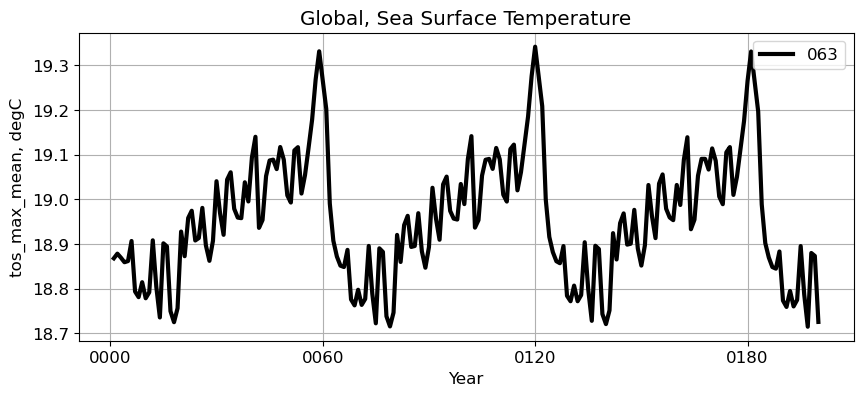

In [9]:
reg = 'Global'
ts_plot(variable, ds, fs, label, reg = reg)

## PersianGulf

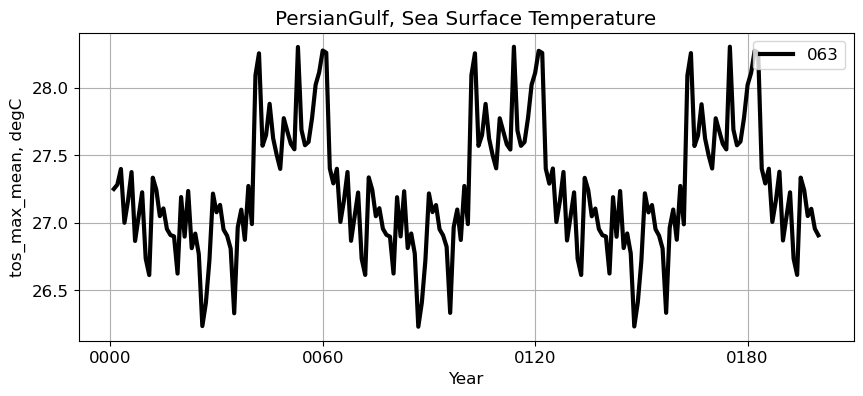

In [10]:
reg = 'PersianGulf'
ts_plot(variable, ds, fs, label, reg = reg)

## RedSea

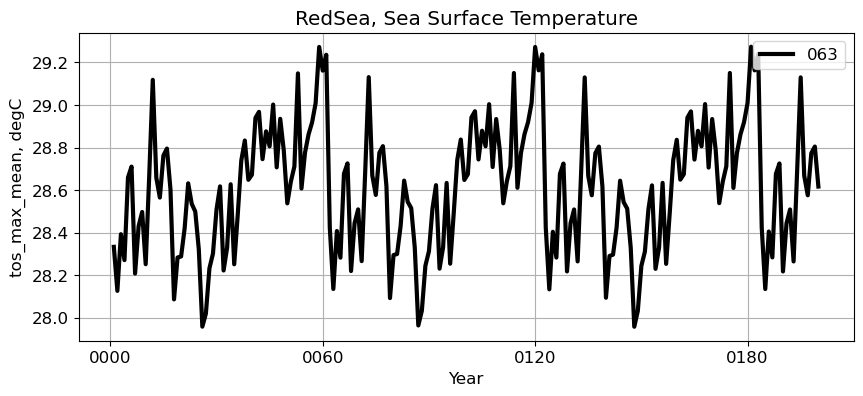

In [11]:
reg = 'RedSea'
ts_plot(variable, ds, fs, label, reg = reg)

## BlackSea

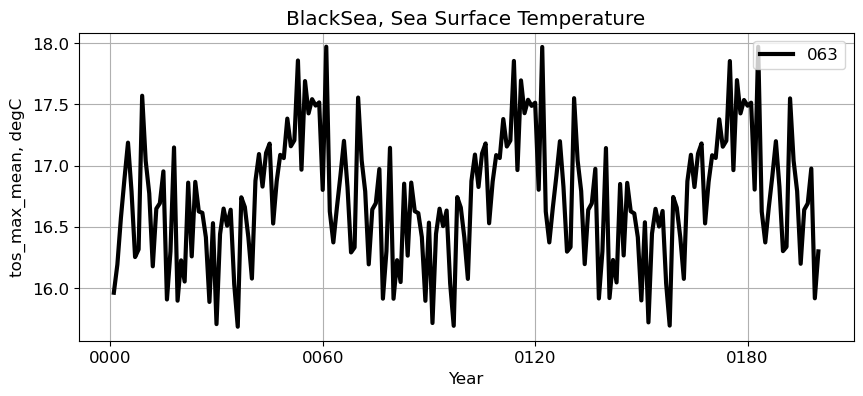

In [12]:
reg = 'BlackSea'
ts_plot(variable, ds, fs, label, reg = reg)

## MedSea

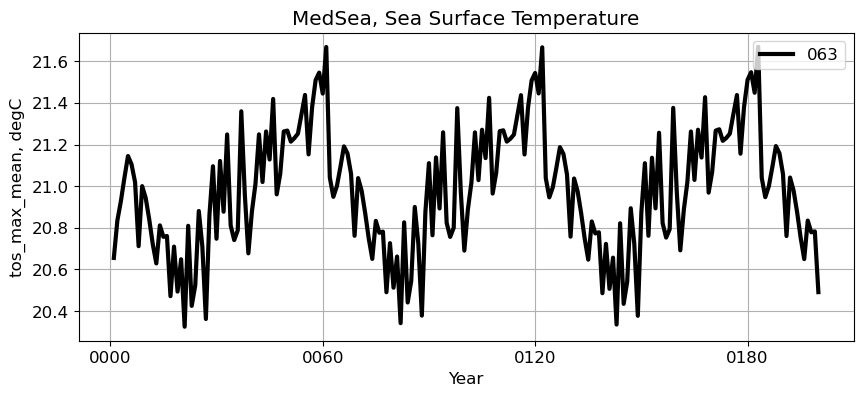

In [13]:
reg = 'MedSea'
ts_plot(variable, ds, fs, label, reg = reg)

## BalticSea

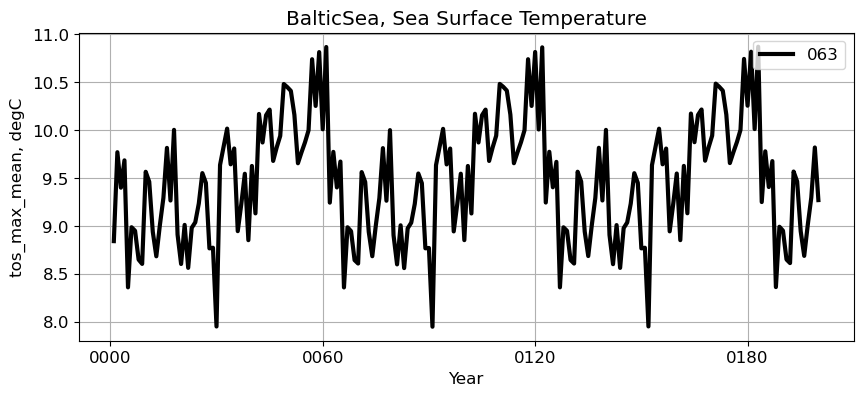

In [14]:
reg = 'BalticSea'
ts_plot(variable, ds, fs, label, reg = reg)

## HudsonBay

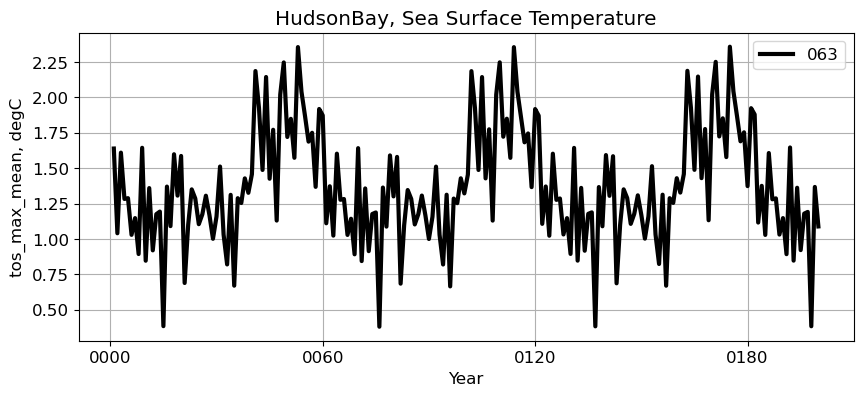

In [15]:
reg = 'HudsonBay'
ts_plot(variable, ds, fs, label, reg = reg)

## Arctic

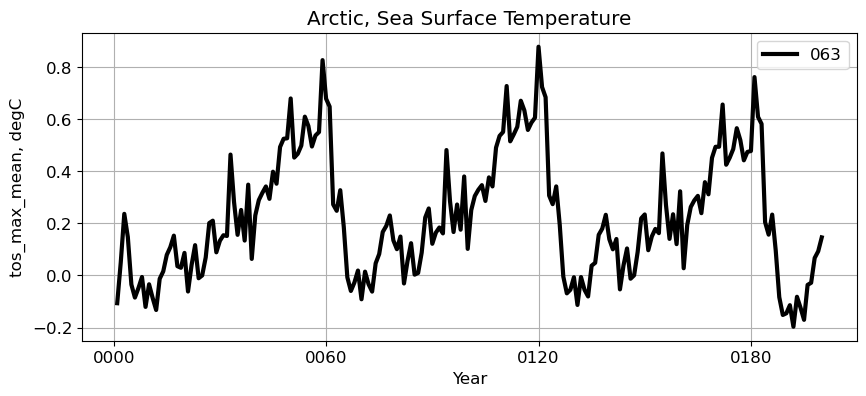

In [16]:
reg = 'Arctic'
ts_plot(variable, ds, fs, label, reg = reg)

## PacificOcean

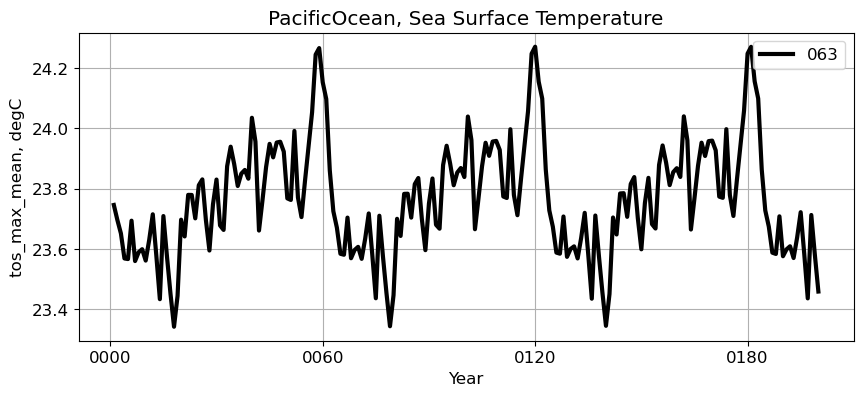

In [17]:
reg = 'PacificOcean'
ts_plot(variable, ds, fs, label, reg = reg)

## AtlanticOcean 

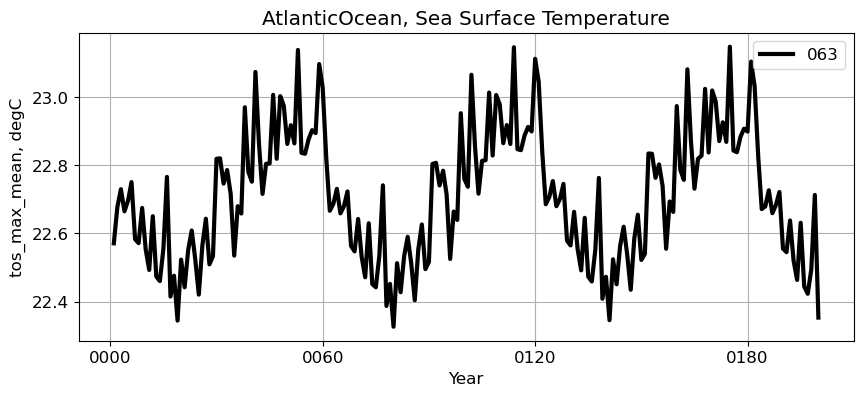

In [18]:
reg = 'AtlanticOcean'
ts_plot(variable, ds, fs, label, reg = reg)

## IndianOcean

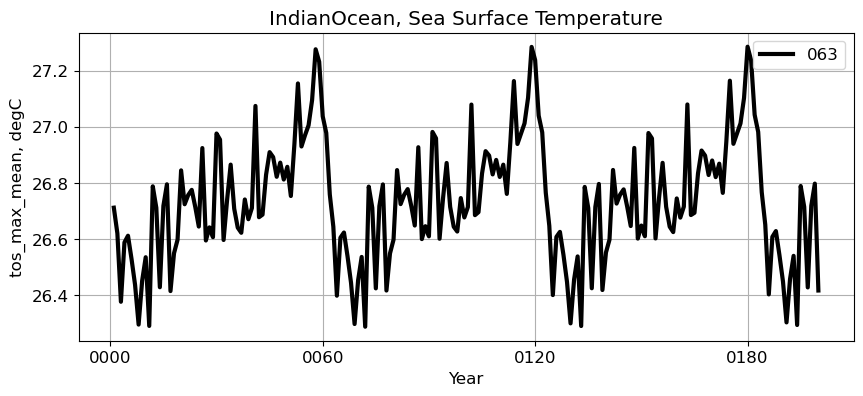

In [19]:
reg = 'IndianOcean'
ts_plot(variable, ds, fs, label, reg = reg)

## SouthernOcean

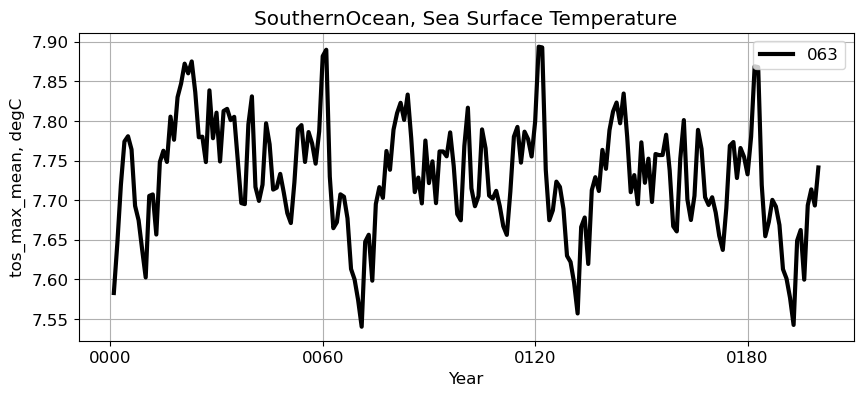

In [20]:
reg = 'SouthernOcean'
ts_plot(variable, ds, fs, label, reg = reg)

## LabSea

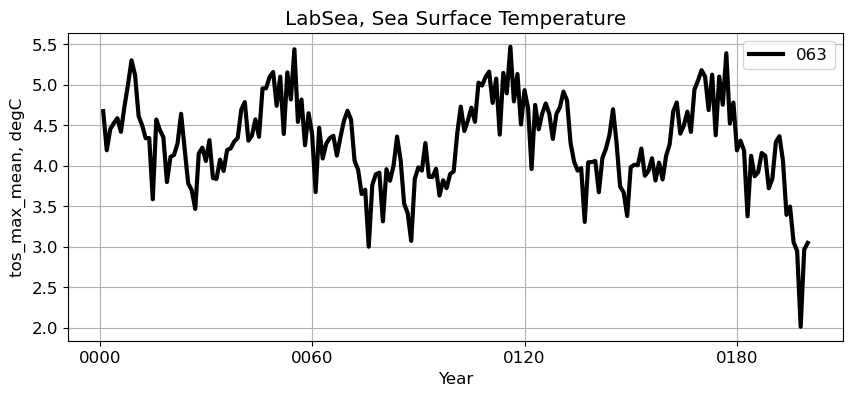

In [21]:
reg = 'LabSea'
ts_plot(variable, ds, fs, label, reg = reg)

## BaffinBay

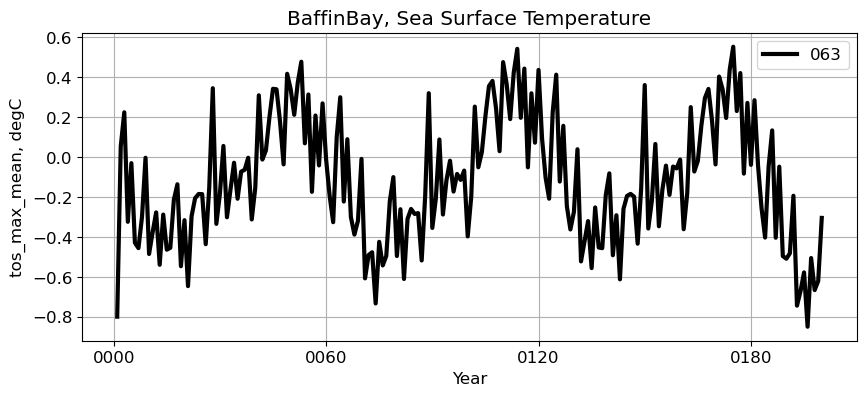

In [22]:
reg = 'BaffinBay'
ts_plot(variable, ds, fs, label, reg = reg)

## Maritime

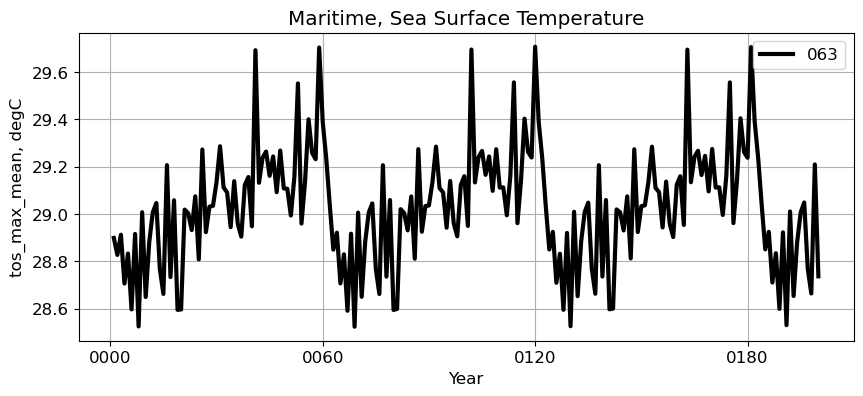

In [23]:
reg = 'Maritime'
ts_plot(variable, ds, fs, label, reg = reg)

## SouthernOcean60S

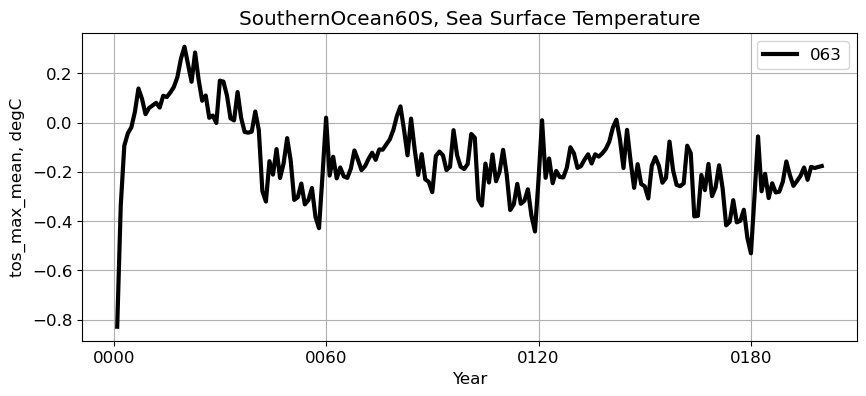

In [24]:
reg = 'SouthernOcean60S'
ts_plot(variable, ds, fs, label, reg = reg)

## EGreenlandIceland

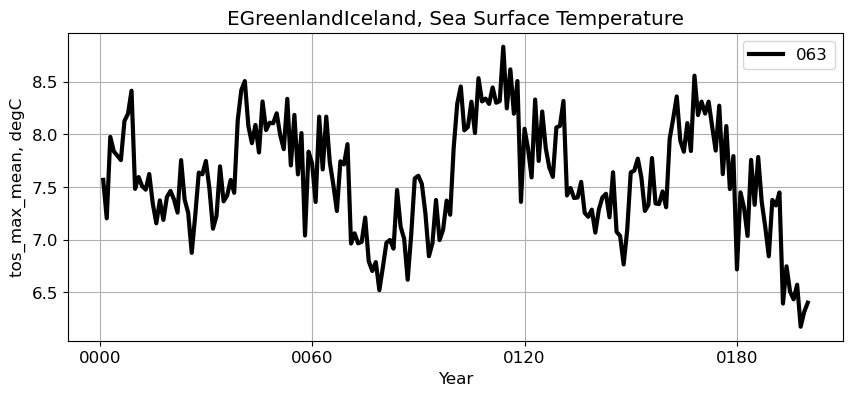

In [25]:
reg = 'EGreenlandIceland'
ts_plot(variable, ds, fs, label, reg = reg)

## GulfOfMexico

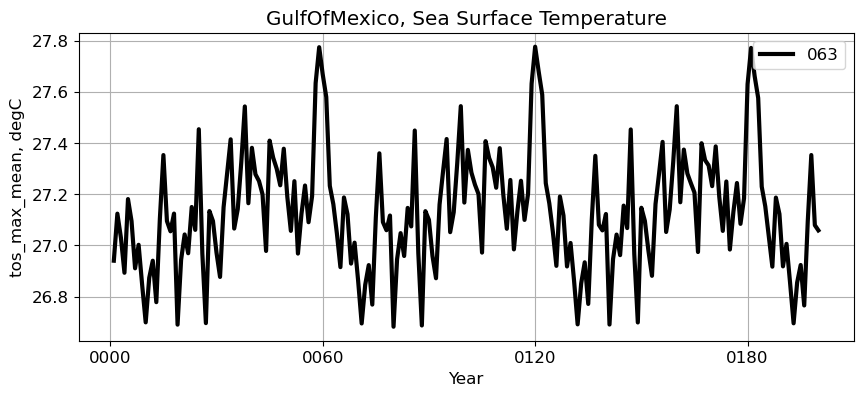

In [26]:
reg = 'GulfOfMexico'
ts_plot(variable, ds, fs, label, reg = reg)